In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# The ring network model

The dynamics of the system, of $N=100$ neurons, is given by:

$\frac{d\textbf{x}(t)}{dt} = - \textbf{x}(t) + J \phi(\textbf{x}(t))$


where the activation funcition $\phi(s) = \tanh(s)$

The connectivity matric of the netwok $J$ is such that the strength between neurons $i$ and $j$ is given by: 

$J_{ij} = 2 \cos(\theta_i - \theta_j)$

where: $\theta \in [0, 2\pi)$ i.e., endpoint not inlcuded

Compute and plot the matrix J, what do you see?

In [65]:
def activation(s):
    return np.tanh(s)

N = 100

thetas = np.arange(0, 2*np.pi, (2*np.pi/100))

Text(0, 0.5, 'Neuron $i$')

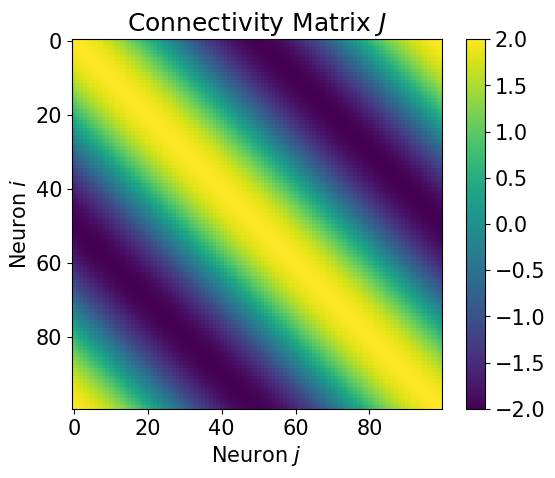

In [66]:
J = np.array([np.zeros(100*100)]).reshape(100,100)
for i, thetai in enumerate(thetas):
    for j, thetaj in enumerate(thetas):
        J[i, j] = 2*np.cos(thetai - thetaj)

fig, ax = plt.subplots()
im = ax.imshow(J, cmap='viridis', interpolation='nearest')
fig.colorbar(im)
ax.set_title('Connectivity Matrix $J$')
ax.set_xlabel('Neuron $j$')
ax.set_ylabel('Neuron $i$')

## 4.2 compute the dynamics:

Use the Euler method to implement the dynamics. Use $dt = 0.1$, $T = 1000$

plot the dynamics $x_i(t), i = 1, \dots, N$

In [67]:
dt = 0.1
timesteps = 1000

In [393]:
np.random.seed(37)
E = np.random.choice([-1, 1], size=(N, 1)) #100 random floats in a 100x1 matrix

In [394]:
X = np.zeros((N, timesteps))
X[:, 0] = E.flatten()

for i in range(1, timesteps):
    X[:, i] = X[:, i-1] + (-X[:, i-1] + J @ activation(X[:, i-1])) * dt

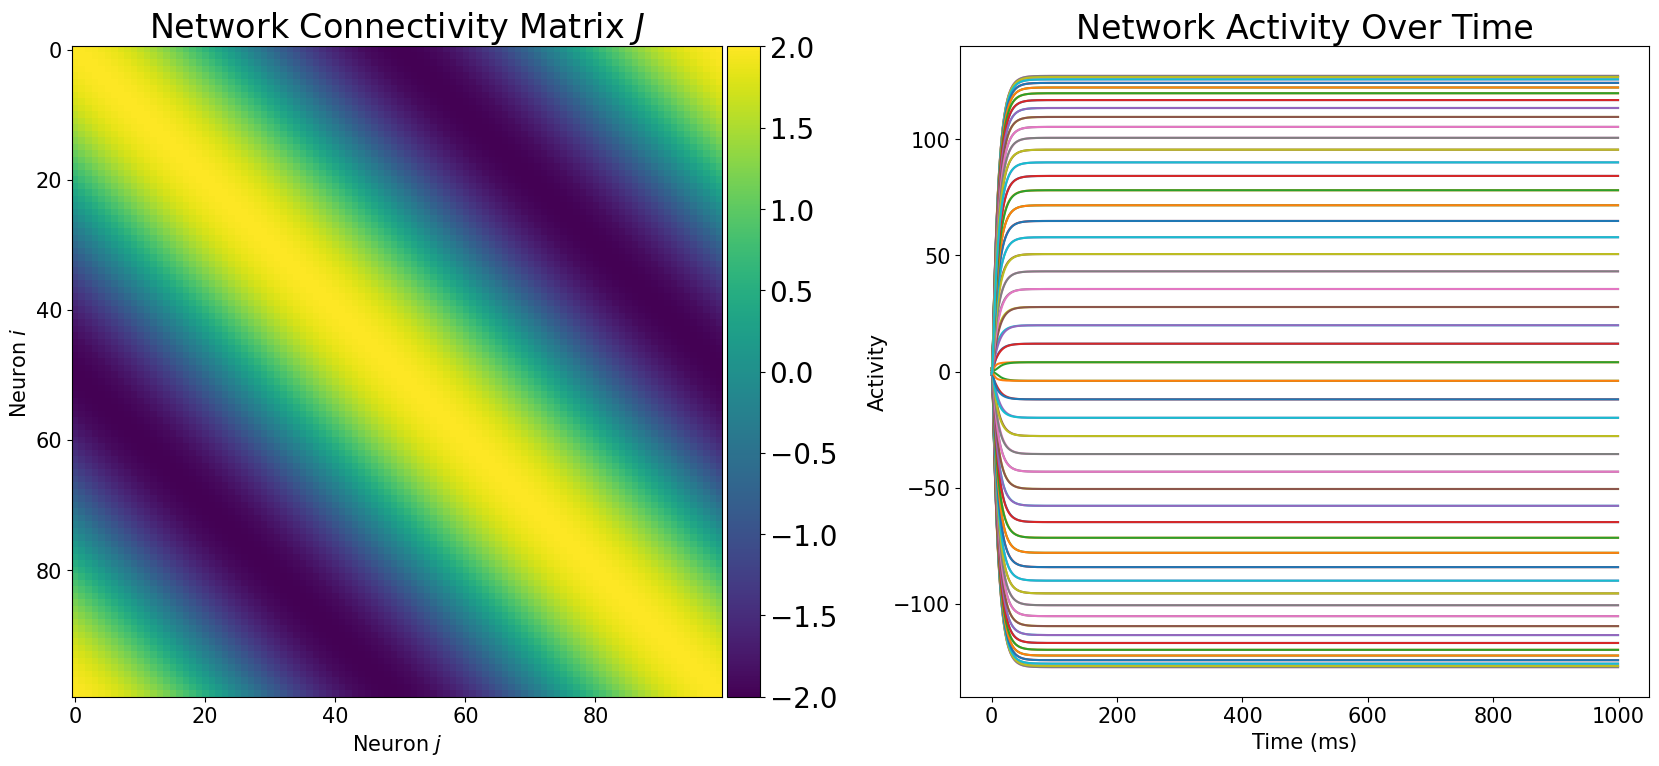

In [395]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 8))
divider_1 = make_axes_locatable(ax1)
plt.rcParams.update({'font.size': 20})
cax_1 = divider_1.append_axes('right', size='5%', pad=0.05)

im = ax1.imshow(J, cmap='viridis')
fig.colorbar(im, ax=ax1, cax=cax_1, orientation='vertical')
ax1.set_title('Network Connectivity Matrix $J$')
ax1.set_xlabel('Neuron $j$')
ax1.set_ylabel('Neuron $i$')

for i in X:
    ax2.plot(i)
ax2.set_title('Network Activity Over Time')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Activity')

fig.tight_layout()
fig.savefig('100N_dynamics.png', bbox_inches='tight')

## 4.3 PCA Time

In [396]:
# X is the matrix contating the 1000 time steps of the 100 neurons

#Centering
means = (X @ np.ones((1000, 1)) )/ 1000 # get the means by dot product of X and 1000x1 matrix of ones and dividing by 1000
X_centered = X - means #subtract the mean of each row from each element of the row

/Users/ciprian/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ciprian/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


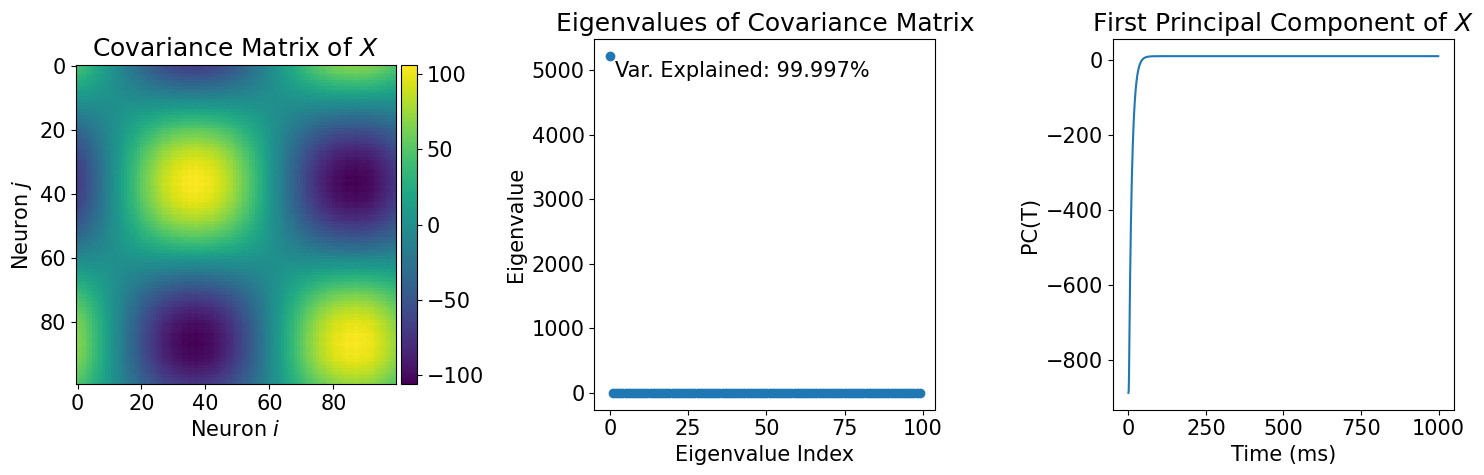

In [404]:
#Covariance
Cov_X = 1/1000 * (X_centered @ X_centered.T)
e, v = np.linalg.eig(Cov_X)
Xpc = X_centered.T @ v[:, 0]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
plt.rcParams.update({'font.size': 15})

divider_1 = make_axes_locatable(ax1)
cax_1 = divider_1.append_axes('right', size='5%', pad=0.05)

im = ax1.imshow(Cov_X)
ax1.set_title('Covariance Matrix of $X$')
ax1.set_xlabel('Neuron $i$')
ax1.set_ylabel('Neuron $j$')
fig.colorbar(im, ax=ax1, cax=cax_1, orientation='vertical')


ax2.plot(abs(e), 'o')
ax2.set_title('Eigenvalues of Covariance Matrix')
ax2.set_xlabel('Eigenvalue Index')
ax2.set_ylabel('Eigenvalue')
ax2.text(1.5, 4900, 'Var. Explained: {:.3f}%'.format(np.round(abs(e)[0]/np.sum(abs(e)) * 100, 7)))

ax3.plot(Xpc)
ax3.set_title('First Principal Component of $X$')
ax3.set_xlabel('Time (ms)')
ax3.set_ylabel('PC(T)')


fig.tight_layout()
fig.savefig('100N_covariance_EVs.png', bbox_inches='tight')



In [405]:
print(f"the explained variance of the first factor is {np.round(abs(e)[0]/np.sum(abs(e)) * 100, 7)}%")

the explained variance of the first factor is 99.9974493%


## 4.4 PCA on a set of attractors

For diff. initila conditions, collect the network attractors. 

In [377]:
Q = np.array([np.zeros(100*500)]).reshape(100,500)

for i in range(500):
    E = np.random.choice([-1, 1], 100, (N, 1))
    X = np.zeros((N, timesteps))
    X[:, 0] = E.flatten()
    j = 1
    while j < timesteps:
        X[:, j] = X[:, j-1] + (-X[:, j-1] + J @ activation(X[:, j-1])) * dt
        j += 1
    Q[:, i] = X[:, -1]

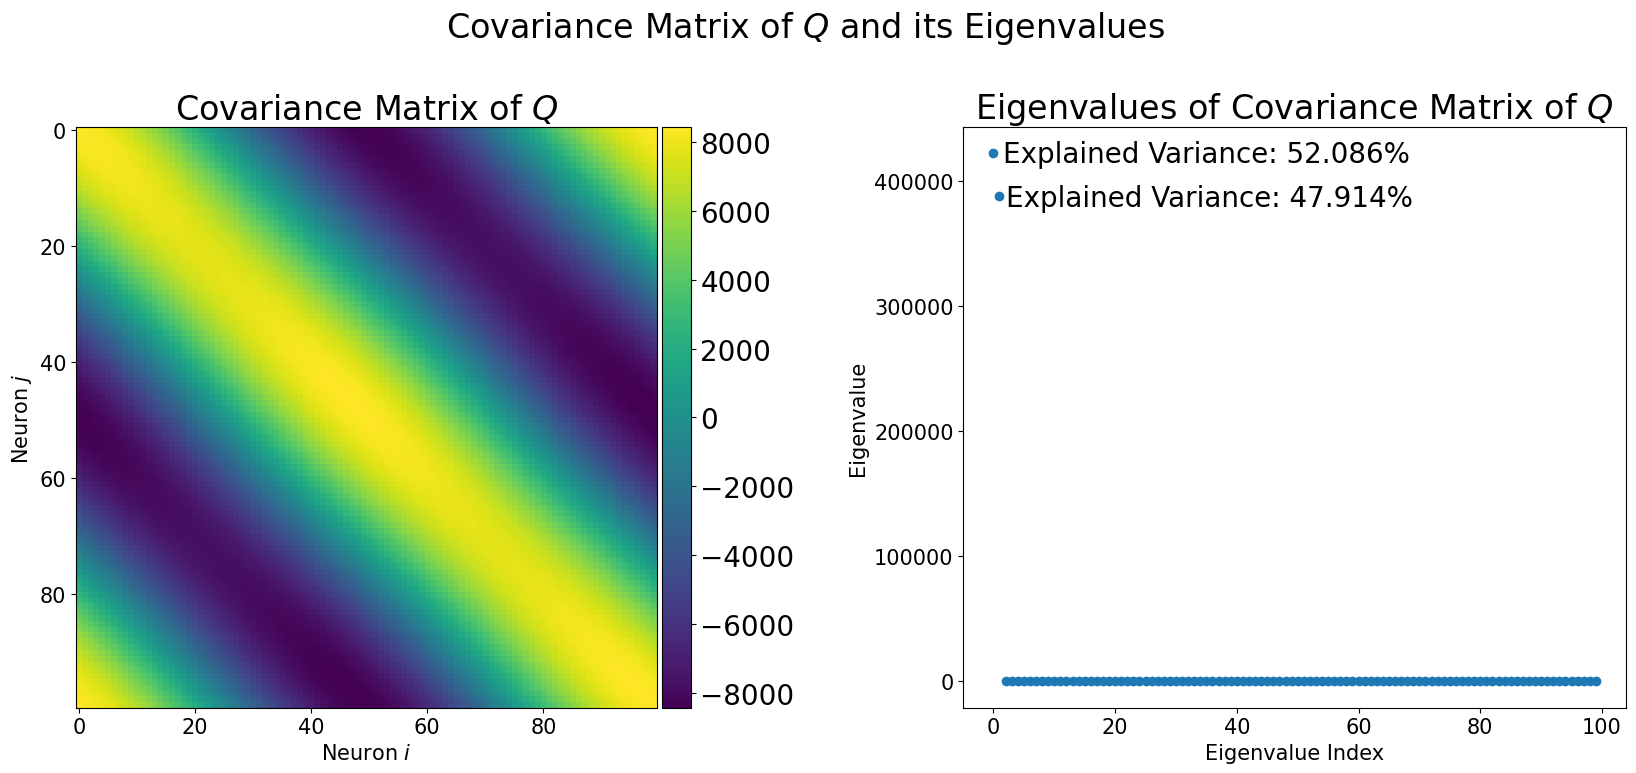

In [378]:
Q_means = (Q @ np.ones((500, 1)) )/ 500 # get the means by dot product of X and 500x1 matrix of ones and dividing by 500
Q_centered = Q - Q_means

Cov_Q = 1/500 * (Q_centered @ Q_centered.T)

e_Q, v_Q = np.linalg.eig(Cov_Q)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 8))
plt.rcParams.update({'font.size': 20})

divider_1 = make_axes_locatable(ax1)
cax_1 = divider_1.append_axes('right', size='5%', pad=0.05)

im = ax1.imshow(Cov_Q)
fig.colorbar(im, ax=ax1, cax=cax_1, orientation='vertical')
ax1.set_title('Covariance Matrix of $Q$')
ax1.set_xlabel('Neuron $i$')
ax1.set_ylabel('Neuron $j$')



ax2.plot(abs(e_Q), 'o')
ax2.set_xlabel('Eigenvalue Index')
ax2.set_ylabel('Eigenvalue')
ax2.set_title('Eigenvalues of Covariance Matrix of $Q$')
ax2.text(1.5, 415000, 'Explained Variance: {:.3f}%'.format(np.round(abs(e_Q)[0]/np.sum(abs(e_Q)) * 100, 7)))
ax2.text(2, 380000, 'Explained Variance: {:.3f}%'.format(np.round(abs(e_Q)[1]/np.sum(abs(e_Q)) * 100, 7)))

fig.suptitle('Covariance Matrix of $Q$ and its Eigenvalues')
fig.tight_layout()
fig.savefig('500A_covariance_EVs_Q.png', bbox_inches='tight')

In [379]:
print(f"the explained variance of the first factor is {np.round(abs(e_Q)[0]/np.sum(abs(e_Q)) * 100, 7)}%")
print(f"the explained variance of the second factor is {np.round(abs(e_Q)[1]/np.sum(abs(e_Q)) * 100, 7)}%")
print("Together, they explain {:.3f}% of the variance".format(np.round(abs(e_Q)[0]/np.sum(abs(e_Q)) * 100, 1) + np.round(abs(e_Q)[1]/np.sum(abs(e_Q)) * 100, 1)))

the explained variance of the first factor is 52.0861351%
the explained variance of the second factor is 47.9138649%
Together, they explain 100.000% of the variance


## Projecting

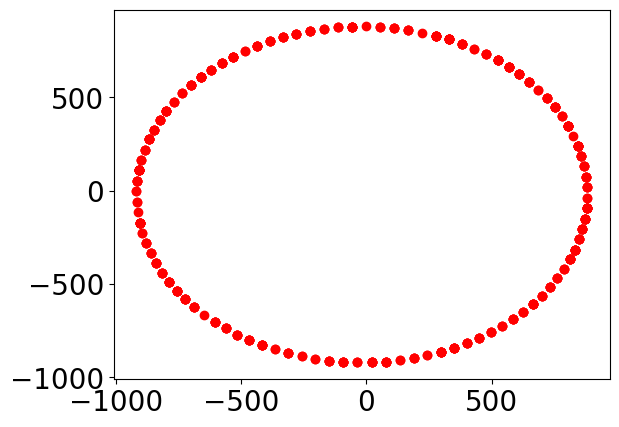

In [380]:
Qpc = Q_centered.T @ v_Q[:, 0:2]
plt.scatter(Qpc[:, 0], Qpc[:, 1], color='red')



/Users/ciprian/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


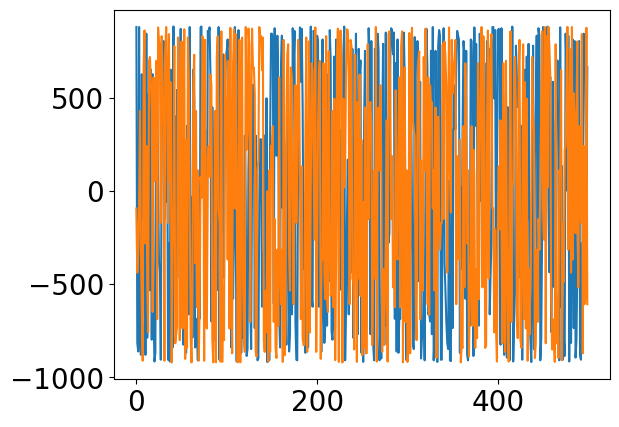

In [381]:
plt.plot(Qpc)

## Sklearn PCA

In [400]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit_transform(Q.T)
components = pca.components_
Q_proj_sklearn = pca.transform(Q.T)


## Plotting both together

/Users/ciprian/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ciprian/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


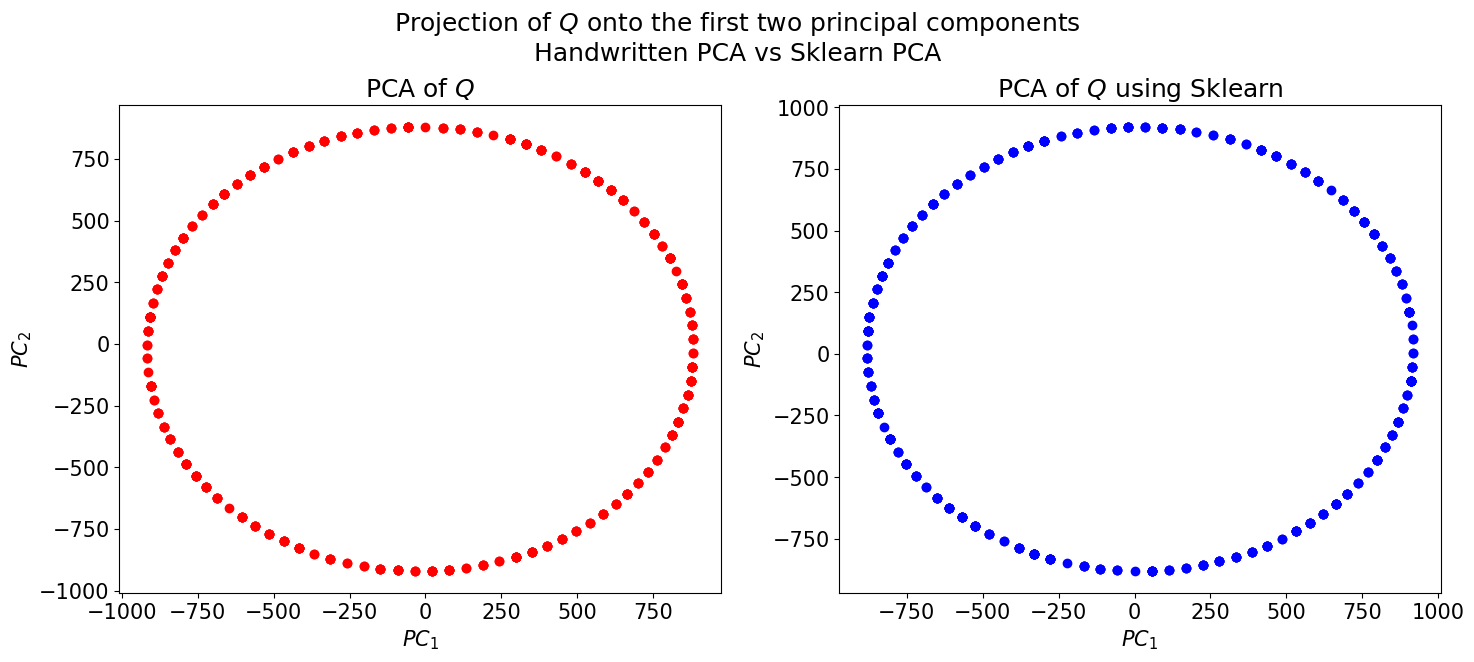

In [401]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1.scatter(Qpc[:, 0], Qpc[:, 1], color='red')
ax1.set_xlabel('$PC_1$')
ax1.set_ylabel('$PC_2$')
ax1.set_title('PCA of $Q$')

ax2.scatter(Q_proj_sklearn[:, 0], Q_proj_sklearn[:, 1], color='blue')
ax2.set_xlabel('$PC_1$')
ax2.set_ylabel('$PC_2$')
ax2.set_title('PCA of $Q$ using Sklearn')

fig.suptitle('Projection of $Q$ onto the first two principal components \nHandwritten PCA vs Sklearn PCA', y=0.95)
fig.tight_layout()
fig.savefig('500A_PCA.png', bbox_inches='tight')